# Programming for Analytics -- Introduction
#### Yufeng Huang
#### Associate Professor of Marketing, Simon Business School
#### July 22, 2024


## Today's class

- Motivation and goals
- Syllabus
- Setting up the coding environment
- Basic concepts / your first lines of code


## What do I do?

- My name is Yufeng, and I teach `Programming for Analytics`

    - Teach programming and PhD-level research topic classes

    - Conduct research related to data analytics in marketing and economics 

    - Interpretable (grounded in economic theory) empirical models to explain consumer and firm behavior (more on these later)
    
    - Out of work: cooking, hiking/mountaineering (learning: serious alpinism), bouldering (learning: trying to get to v6), photography (learning: video editing), and trying to get into trail running

## What is your background?

- What is your undergraduate major (or previous degree)?
- How much experience do you have with data?
- How is your programming experience?
- Survey link
  - [Survey Link (MSMA)](https://forms.gle/SQLFftm8uszJkyrN7)
  - [Survey Link (MSBA)](https://forms.gle/nxyvkwoRv9939wrn7)

## Motivation: Why are you here?
- ChatGPT answer to "why study data science"
    - but what does it mean?

<img src="./input/chatgpt_screenshot.png" width="800"/>


## Example: pricing
- For many years, I've studied pricing both in terms of how it *should be* done and how it *is* done

- Traditional management often uses simple heuristics that are passed down from
    - own heuristic experience (*"I've done something similar before and this strategy makes sense"*)
    - learning from others' experience (or rather, hearsay) (*"I've seen someone else done this before"*)
    - learn through pricing cases in an MBA class
    - learn economic theory, which says "MR = MC"
    
- For example, how to set a listing's price on Airbnb 
    - Janna Bay (head of research at Airbnb), *“[F]or many hosts, finding the right price for their space can be both time-consuming and challenging... Even many experienced hosts told us that they find pricing difficult, especially as seasons change, special events come to town, and more listings emerge in their neighborhood.”*


### Example: Airbnb pricing
- Algorithmic pricing on Airbnb will account for seasonal and night-specific realizations of demand and competition
<img src="./input/price_variation_example_2-1.png" width="1000"/>

- But most Airbnb hosts set heuristic prices -- e.g. one price for all nights, or fixed weekday/weekend pricing
<img src="./input/price_variation_example_1-1.png" width="1000"/>

### But how?
- Wait, you say, I've never done Airbnb pricing before, how would you expect me to have the experience?

- My point is: *"you don't, but you have data"* (*and coding, math, statistics, and other knowledge*)

- For argument's sake, suppose I were to set one price to maximize profits, I know the demand curve is $$\log(Q) = 4 - 2\log(P)$$ and that marginal costs is $MC=1$
    - is the optimal price $1 plus 30% markup? (The famous 30% markup rule, which is a bad heuristics among practitioners)
    - if I know enough calculus and economics, I'd do an optimization exercise and get that the profit-maximizing price is $P=2$
    - but I can also just write a standard gradient descent algorithm and solve for this price

In [14]:
# An example gradient descent algorithm

# First, import modules; here: 
#   math (basic math functions, log and exp)
#   matplotlib (used for plots)
import math
import matplotlib.pyplot as plt

# Demand function
def demand(price):
    quantity = math.exp(4 - 2 * math.log(price))
    return quantity

# Profit function
def profit(price):
    profit = (price - 1) * demand(price)
    return profit

# Numerical derivative
def derivative_profit(P, delta=0.01):
    return (profit(P) - profit(P - delta)) / delta

# Initialize starting point and the history of visited prices and profits
price_history = []
profit_history = []
price_current = 1.33    # the famous "30% markup rule", which is a bad heuristics among practitioners

for i in range(10000):
    price_next = price_current + 0.1 * derivative_profit(price_current) # next price: search along the derivative of profit
    current_profit = profit(price_current)
    price_history.append(price_current)                                 # append results
    profit_history.append(current_profit)
    if abs(price_next - price_current) < 1e-8:                          # stopping rule
        break
    price_current = price_next                                          # replace price to prep for the next iteration

# Output the optimal price and the corresponding profit
optimal_price = price_current
max_profit = profit(optimal_price)

print(f"Optimal Price: {optimal_price:.2f}")
print(f"Maximum Profit: {max_profit:.2f}")


Optimal Price: 2.01
Maximum Profit: 13.65


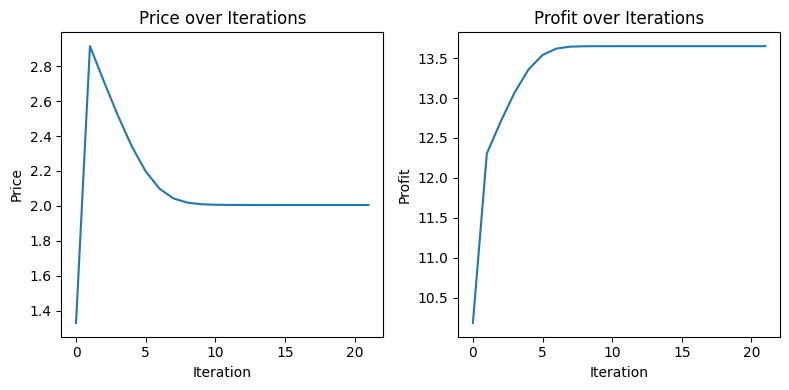

In [2]:
# Plot the price and profit over iterations to show which points we tried
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(price_history[0:100])
plt.title("Price over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Price")

plt.subplot(1, 2, 2)
plt.plot(profit_history[0:100])
plt.title("Profit over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Profit")

plt.tight_layout()
plt.show()

- My point
    - coding + data + math can solve real business problems
    - that's why the industry wants data analysts/scientists, data-driven consultants, academics, etc.

- The ultimate goal of this class (and many classes after this) is to train toward that objective

### But why Python?

- Coherence (contrast `R`)

- Flexibility and simplicity of code

- Large communities (contrast `Julia`), which leads to
    - high demand by the industry
    - wide availability of packages, which are also well-maintained

- In fact, several core data science packages have reached the point where it starts to make sense to use Python for data science work even outside of machine learning
    - but side note: `R` is still very good at this

- Popularity does not lie: https://pypl.github.io/PYPL.html


## Syllabus
- Structure 
- Topics
- Assignments
- Exam
- Grading
- Do’s and Don’ts

### Structure
- Lectures
  - in total 13 meetings, 2 hours each, in-class
  - every Monday, Tuesday, and Thursday

- Labs
  - Kang Huang (PhD student in Marketing) teaches 1 one-hour lab every Friday, starting this week
  - reviews key concepts we covered in the week’s class
  - optional, but highly recommended unless you find the class super trivial

- Office hours
  - Kang, Babli (TA), Dawn (TA), Qihao (TA), Muyang (TA), and I will hold one office hours each week
  - Kang's and my office hour are in-person. Babli, Dawn, Qihao, and Muyang on Zoom. 
  - there will be an office hour every day except for Monday, and I REALLY encourage you to come to office hours to resolve your questions (and please try coming earlier than the assignment deadlines)
  - exact schedule on the syllabus and on Blackboard
  - urgent or quick questions: first try to resolve it yourself, then email me or any TA

- Assignments
  - two assignments each week, due Wednesday and Sunday 11:59 pm Eastern Time (local time in Rochester)
  - $5\times$ "replication" assignments, where you're asked to type in and run the code discussed in the class
  - $3\times$ "homework" assignments, where you're asked to solve a problem you have not seen before (but you have seen something related in class/labs), which requires deeper thinking and trial-and-errors
  - all assignments are essential part of the learning process

### Week 1: introduction and coding basics
- Installing Anaconda, the first few lines of code
- Basic data types: numbers (int and float), strings, lists (and tuples, dictionaries, sets)
- Programming basics (if/else, loops, functions)

### Week 2: data structure
- NumPy
- Pandas
- Visualization
- Examples
- First real "homework assignment," where one works with a small but real dataset

### Week 3: more advanced data frame operations
- Pandas/Polars
- Regular expressions
- Examples
- A much larger-scale homework assignment

### Week 4: more advanced programming
- Loops and functions at an application level
- Thinking about computation burden and efficiency
- Examples and a homework assignment

### Grading
- Numeric grades
  - 1% for correctly setting up the environment
  - 5% each of the five replication assignments
  - 8% each of the three homework assignments
  - 50% final exam
- Numeric grades are then curved (i.e. only ranking matters) to produce the letter grades
  - highest grade is A, lowest grade is usually B-

### Attendance
- You should come to class on time
    - I don't track attendance
    - but we're all adults

- If you come to the class, you should participate
    - listen to the lecture
    - raise questions and comments, openly to the entire class
    - no question should not be asked! (I don't agree with "there's no stupid question," but I ask a ton of stupid questions myself anyways)
    - if I see you're engaged in a prolonged conversation, I'll probably ask you to direct your question to class
    
- Language = English

### Replication assignments
- Five replication assignments
  - due Wednesdays of each week and Sunday of the first week, 11:59 pm sharp

- Task: replicate the code talked about in class
  - code is much easier to read than to write (e.g., I can understand Cantonese but cannot speak it)
  - the purpose is to "force" ourselves into familiarizing with the code
  - no strict requirement in what you write, only a general guidance
  - will not evaluate what you write, but will evaluate whether you submitted *a* file to BB on time
  
- My recommendation is to (1) try to follow the class and type the code, and (2) if this is too hard, watch video and type code that appears there

### Homework assignments
- Three replication assignments
  - due Sundays starting next week, 11:59 pm sharp

- Task: a comprehensive set of questions based on a dataset (or a few datasets)
  - need to think through what to do and come up with a plan, and then execute this plan
  - will evaluate whether you've completed the task in a reasonable manner, but won't have a universally correct answer
  
- Do not wait until Saturday to start working on the homework assignment!

### Exam
- A more comprehensive exam aiming to test the knowledge we’ve learned throughout the entire term

- Closed book, no computer, but can bring a "cheatsheet"
    - a sheet of paper, on which you can write/print anything before the exam

- Quesitons will include T/F, multiple choices, fill in the blank, and comprehensive coding questions


### Academic integrity
- The school takes academic integrity very seriously
    - if you violate it, it is in my job description that I report the case to the Academic Integrity Committee
    - your academic advisor will talk more about this

- *"But can I talk to my classmates about class material?"*
    - absolutely yes!
    - communication is essential in the learning process
    - bottom line: do not ask anyone for assignment solution / do not give anyone assignment solution

- The same rule applies to ChatGPT usage


### ChatGPT is a useful tool and a harmful tool
- ChatGPT can give you the correct solution to basically anything in our class
  - *"But why don't we need to learn coding then?"* -- any thoughts on this?

- If you agree the previous answer is not *"so we don't need to learn coding"* 
  - then we have to be smart about ChatGPT
  - i.e., use it as a learning tool, not a replacement of our brain

- Good practices
  - not use it at all during the class (I won't mandate this, but this will help you in the long run)
  - do not use it on the day when you're trying to solve the exam question (good rule of thumb, strongly suggest we follow)
  - ask generic questions, treat it as a documentation 
    - *"what is the function that calculates natural logarithm?"*
    - *"what is the difference between logical operators '&' and 'and'?"*

- Bad practices 
  - *"I have a homework, here's the Jupyter notebook instructions, fill in the answer for me"* (the worse practice)
  - believe me, it will do very well, but you won't learn much from doing this

- Bottom line: don't use ChatGPT to generate anything you can directly copy and paste
  - you'll see that the one and only exception I make is plot, which is tedius and a perfect application of ChatGPT

## Installing Anaconda and setting up the environment

- Follow my instruction as a Windows user:

1. Download Anaconda from https://www.anaconda.com/download/success (hopefully you have downloaded it)

2. Install Anaconda for all users, choose folder, and select "register Anaconda as the system Python 3.12"

3. For Windows, select "environment variables" => "path", then check "anaconda3", "anaconda3/scripts" and "anaconda3/library/bin" are in path
    - why? We'll be refering directly to programs in that folder, such as "conda" and "python", and adding path helps the system recognize that we mean *that specific program*

4. Now setup an environment "gba464"
    - why? In Python, packages can easily run into conflict, so creating a virtual environment helps isolating one project from another. We'll be using "gba464" for this class.
    - open "Anaconda Prompt" on windows
    - type `conda create -n gba464 python=3.x` to create this environment (I use Python 3.9)
    - type `conda activate gba464` to activate it, and you should see prompt changing from (base) to (gba464)

5. Now install some packages in this environment
    - type `pip install numpy==1.26.4` for numpy (numpy 2.0.0 is out, but it does not yet have wide compatibility)
    - type `pip install pandas matplotlib` to install matplotlib and pandas together
    - alternatively, can use "conda install ..."

6. Enter python from command line (Anaconda prompt) and test it
    - type `python` and enter Python from the command line (find that the prompt changes)
    - type `import numpy` to import the NumPy module, which we just installed
    - type `numpy.__version__` to check the package's version, see it is 1.26.4 (__version__ is a universal method in virtually all modules; more on this on Friday)
    - type `exit()` to exit python (the () indicates we're calling the function "exit")

7. Set a work directory, then run the browser integrated Jupyter Notebook
    - type `cd your_local_directory` to change directory (*"cd G:/dropbox/teaching/programming_for_analytics/2024/1_1_introduction/*)
    - when you change drive, e.g. I wanted to switch to G:, have to type the drive again (`g:`)
    - in this directory, launch Jupyter Notebook by `jupyter notebook`

8. Optional: install an IDE (integrated development environment)
    - eventually, the browser jupyter notebook editor won't be enough. Consider installing Visual Studio Code now or later

- Similar steps for a Mac user (instruction "translated" by ChatGPT)

1. Download Anaconda from https://www.anaconda.com/download/success. Download the installer for macOS. Make sure to download the graphical installer, which is easier to use for beginners.

2. Install Anaconda using the downloaded file (the .pkg installer). Select install for all users if applicable.

3. Updating system paths is typically not necessary for a Mac user. 

4. Setting up the environment
    - open the terminal (applications => utilities)
    - type `conda create -n gba464 python=3.x` to create the environment
    - activate the environment using `conda activate gba464` in terminal

5. Install packages 
    - run `pip install numpy==1.26.4` 
    - run `pip install pandas matplotlib`

6. Test installation (same as Windows)

7. Set working directory and run Jupyter notebook (same as on Windows)

8. Optional: install an IDE (same as on Windows)

## First lines of Python code
- We will try running a few lines of code
    - operations between numbers
    - comment
    - print "Hello world"
    - declare a variable and assign values

### A note on Jupyter Notebooks (.ipynb)
- My lecture notes are primarily delivered in Jupyter Notebook format

- A section (like this) is called a cell
    - can be a "markdown" cell that contains formatted texts, images, etc.
    - or can be a code cell the contains Python code and possibly console output

- You should feel free to make notes directly on the cell and "save as" the file
    - and when it comes to a code cell, you can make notes using "comments" (more on that later)

- Also note that Jupyter notebook is not the only place you write code
    - you can write code and run it in console (try it!)
    - you can also write .py file, which we'll use a lot more in later classes (and in projects)

In [3]:
# Can use Python as a calculator
5 + 4

9

### Comments
- We use "#" to start a comment, and anything to the right of it is ignored

- We sometimes use multi-line comments, which start and end by triple quotes (''' or """)

- In your own coding, you should leave comments so that others, including yourself (now or later), can understand your code

- In class, I leave comments in a code cell both for you and for myself to understand my code

- Examples below

In [4]:
# This is a comment, nothing is run

In [5]:
This is not a comment, an error will occur

SyntaxError: invalid syntax (2818562428.py, line 1)

In [6]:
'''
This is a multi-line comment (which is actually a long string)
We use this to write a section of things that are not intended to be run. 
For example, we can write a paragraph that documents a function's purpose, input and output
'''

# then run 3 minus 5
3 - 5

-2

In [7]:
# Multiplication
2 * 3   # note: you can leave a comment to the right of this code

6

In [8]:
# Division
# 1 / 6     # note: this line not executed because of the "#" on the left. We often say this line is "commented out"

In [9]:
# ** for power, which we write as 4^2 in some other languages
4 ** 2

16

In [10]:
# import the math module
import math

# some functions are in the math module
math.log(2) 

0.6931471805599453

In [11]:
# Jupyter notebook only displays the last line in each cell
2 + 5
5 * 4
6 ** 2

36

### The "print" function
- The print function displays the value of an object in the console

- It does not alter the object

- print(A, B) will print the value of two objects next to each other

- by default, each code cell will print the value of its last line, and that's why you see only the last line's output

In [ ]:
# "print" function
print(2 + 5)
print(5 * 4)
print(6 ** 2)

7
20
36


#### Can print the value of a string
- Loosely speaking, a string is a series of characters, and it is on its own a data type (more on this tomorrow)

In [ ]:
print("Hello world")

Hello world


In [ ]:
print("Hello class")

Hello class


### Variables
- What if we want to say Hello to different people?
    - world vs class

- We can 
    - declare a variable
    - assign it to either "world" or "class"
    - combine it with string "Hello"
    - and then print the output

- Sound difficult?

In [ ]:
name = "world"          # declare a variable "name", assign it string "world"
print("Hello" + name)   # combine it with the word "Hello" (more formal on this tomorrow) and print

Helloworld


In [ ]:
# But looks ugly! How to fix it?

- A variable is a **pointer** that references an object stored at a particular memory address
- Think of it as a name that refers to an object

In [13]:
# What is b?
a = 1
b = a
print(b)

1


- Legal variable names must start with a letter or underscore `_`, and it cannot contain any symbols other than the underscore
    - preferably, all lower cases or underscores, as I indicate below
- Certain variable names are protected, e.g., `class`

In [ ]:
# Example of illegal and legal variable names
1_constant = 1
one_constant = 1
constant_1 = 1

### Readability

One should follow conventional variable naming conventions:
- A variable's name should be informative
    - instead of `a` and `b`, use `oil_price`, `sales_quantity`

- It should (but does not have to be) be all lower cases
    - lower cases words usually for variables and functions (`diameter`, `mean`)
    - upper cases words are usually reserved for constants (`PI`)
    - capitalized words (initial letter capital) often used for classes

- Word separation with underscore, `_`

- Trust me, this will make your code much more readable

Since we're on the topic of "readability," one more thing: 
- *You should have appropriate spacing between variables and operators*

- Keep in mind: *your code is meant to be read by both the computer and human beings*

In [15]:
# Spacing
a = 1
b = 2
print(a + b)
print((3 * a) + b)

3
5


### More advanced print and variable assignment examples

In [ ]:
# Another example
name = "Yufeng"
age = 21
activity = "drink"
print(name, age, activity)    # print two objects side by side

Yufeng 21 drink


In [ ]:
# Can assign multiple variables at once
name, age, activity = "Yufeng", 21, "drink"
print(name, age, activity)

Yufeng 21 drink


In [ ]:
# Combine all strings into a sentence (more on the use of "+" tomorrow)
print("Hello, my name is " + name + ", I am " + str(age) + " years old, so I can " + activity) 

# reassign variable values: at the age of 16, Yufeng is allowed to drive


Hello, my name is Yufeng, I am 16 years old, so I can drive


- But, you ask: do we have to so tediusly add up every string?

- Advanced topic: formatted output

- "print" can specify formats using one of three ways:
    - "the f-strings" -- print(f"str{var}str")
    - ".format method" -- print("str{}".format(value))
    - print("str%type" %(value))

- No need to hard-memorize; we'll naturally use this later

In [ ]:
# The "f-strings"
print(f"Hello, my name is {name}, I am {age} years old, so I can {activity}")

Hello, my name is Yufeng, I am 16 years old, so I can drive


In [ ]:
# .format() method
print("Hello, my name is {}, I am {} years old, so I can {}".format("Yufeng", 16, "drive"))

Hello, my name is Yufeng, I am 16 years old, so I can drive


In [ ]:
# This approach is outdated
print("Hello, my name is %s, I am %d years old, so I can %s" %("Yufeng", 16, "drive"))

Hello, my name is Yufeng, I am 16 years old, so I can drive


## Summary
- The most important lesson is Yufeng is old enough to drink or drive

## Summary (more seriously)
- Motivation - that Python (or coding in general) provides a powerful tool for us to eventually get to data-driven decisions

- Setting up the environment (note: submit screenshot on BB by Wednesday)

- First few lines of code
    - calculator
    - comments
    - print
    - assign values to a variable